## Training dataset 

Tesheena S.

This script does a random forest regression analysis on the dataset which also then splits and trains the data using the input file. This then predicts the 2030 AQI category days for the counties and an output csv file. The R^2, MSE, MAE and RMSE values from the model is evaluated as well as the residual.

In [ ]:
# Imports

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# path to CSV file
file_path = r"C:\Users\Admin\OneDrive - nwmissouri.edu\46613\OneDrive - nwmissouri.edu\Capstone\Data\all_data.csv"

# Read data  file
all_data = pd.read_csv(file_path)

In [ ]:

# Define AQI categories as target variables
aqi_categories = [
    "Good Days", 
    "Moderate Days", 
    "Unhealthy for Sensitive Groups Days", 
    "Unhealthy Days", 
    "Very Unhealthy Days", 
    "Hazardous Days"
]


# Define features
features = all_data.drop(columns=aqi_categories + ["Days with AQI"])
features = pd.get_dummies(features, columns=["State", "County"], drop_first=True)

# Define target variables (AQI categories)
targets = all_data[aqi_categories]

Split and train dataset

In [ ]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Train Regression Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Step 3: Make Predictions for 2030
# Prepare input features for 2030 predictions (use unique counties and states)
future_features = features.copy()
future_features["Year"] = 2030  # using year 2030 for prediction

predictions = model.predict(future_features)

# Convert predictions to whole numbers (rounding) This is a fix to what was previously giving decimal (days must be whole) 
predictions = np.round(predictions).astype(int)

In [ ]:

# Save Predictions to CSV File
state_county_df = all_data[["State", "County"]].copy().reset_index(drop=True)  

predictions_df = pd.DataFrame(predictions, columns=[f"Predicted {col}" for col in aqi_categories])
output_df = pd.concat([state_county_df, predictions_df], axis=1)

In [19]:
output_file_path = r"C:\Users\Admin\OneDrive - nwmissouri.edu\46613\OneDrive - nwmissouri.edu\Capstone\Data\predicted_aqi_2030.csv"
output_df.to_csv(output_file_path, index=False)
print(f"Predictions saved to '{output_file_path}'")

Predictions saved to 'C:\Users\Admin\OneDrive - nwmissouri.edu\46613\OneDrive - nwmissouri.edu\Capstone\Data\predicted_aqi_2030.csv'


Model Evaluations (RMSE, MSE, MAE and resiual analysis)

Mean Absolute Error (MAE): 1.39
Mean Squared Error (MSE): 15.61
Root Mean Squared Error (RMSE): 3.95
R² Score: 0.93


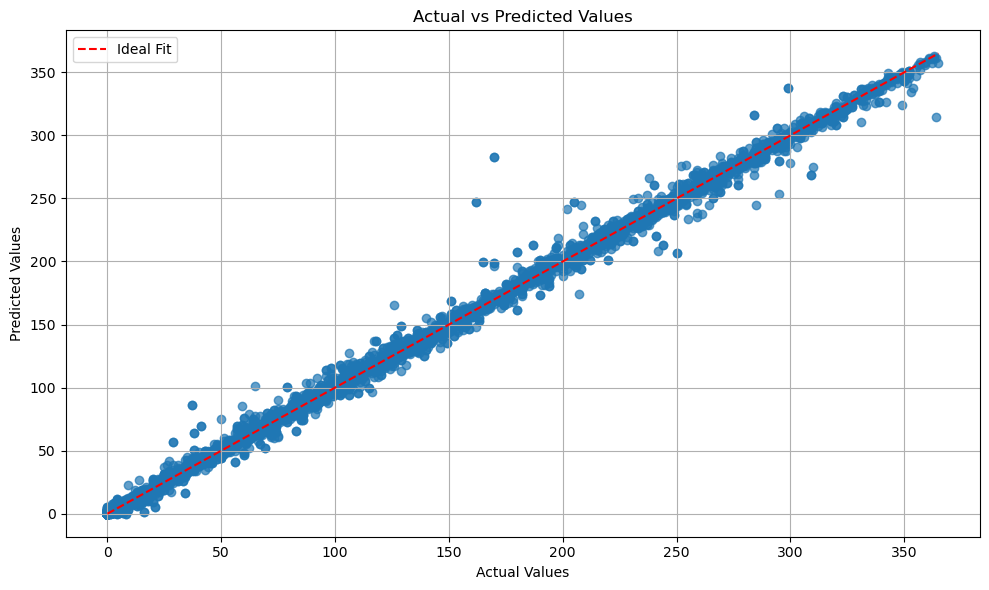

In [ ]:
# Evaluate Model Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize Predictions

## Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test.values.flatten(), y_pred.flatten(), alpha=0.7)
plt.plot([min(y_test.values.flatten()), max(y_test.values.flatten())], 
         [min(y_test.values.flatten()), max(y_test.values.flatten())], 
         color='red', linestyle='--', label="Ideal Fit")
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Metric	Value	Interpretation

MAE 	1.39	Low average error; predictions are highly accurate.

MSE	   15.61	Few large errors; model handles outliers well.

RMSE	3.95	Predictions deviate slightly; overall good accuracy.

R²  	0.93	Model explains most of the variance in target variables; strong fit. (close to 1)

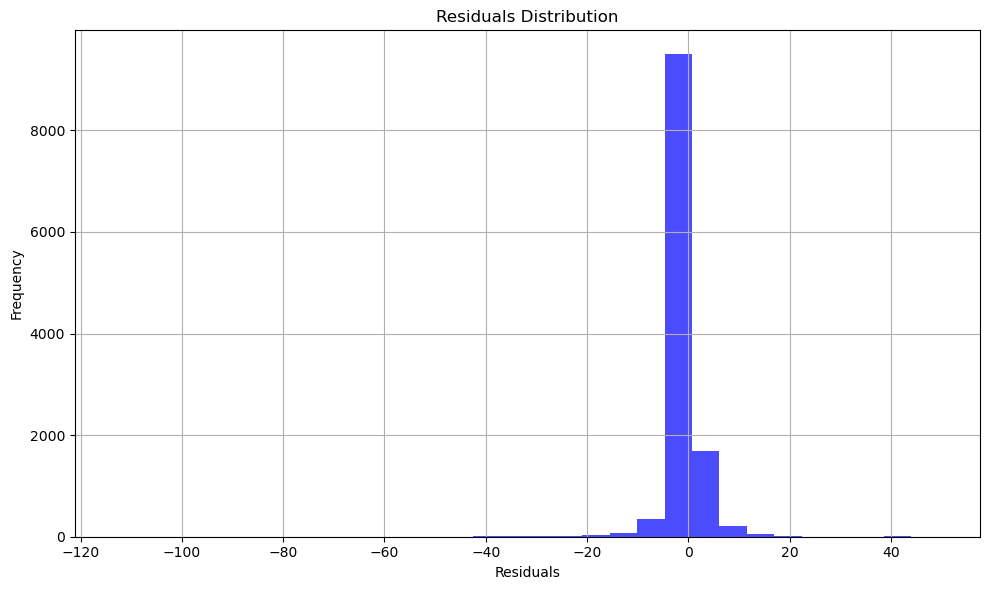

In [23]:
## Residual Analysis
residuals = y_test.values.flatten() - y_pred.flatten()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

## Residuals analysis

Residuals are the differences between the actual values and predicted values:
Residual=Actual Value−Predicted Value

This analysis:

In my analysis here it is centered around zero which indicates that the model does not systematically overpredict or underpredict.

If residuals are skewed to one side, it indicates bias in your model which is not the case in my analysis.

